In this notebook I'm going to implement some of the fundamentals concerning (pseudo) spectral methods from scratch, using numpy.

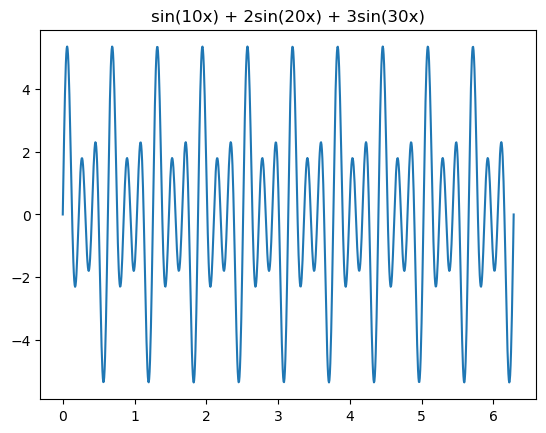

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
'''Intro to DFT with example on finding frequency spectra of simple function'''

def f(x):
    return 1*np.sin( 10* x) + 2*np.sin(20*x) + 3*np.sin(30*x)
N = 1024
x = np.linspace(0, 2*np.pi, N)
y = f(x)
plt.plot(x, y)
plt.title('sin(10x) + 2sin(20x) + 3sin(30x)')
plt.show()

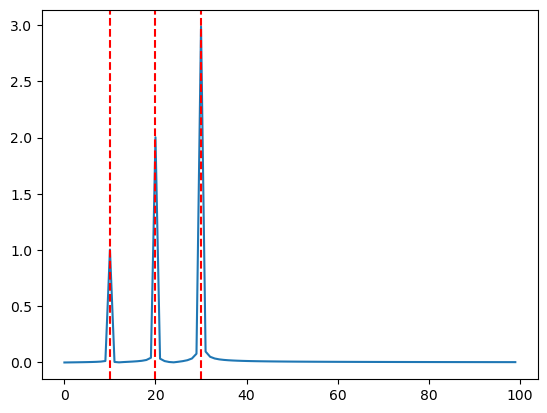

Frequency: 10, Coefficient: 1.0
Frequency: 20, Coefficient: 2.0
Frequency: 30, Coefficient: 2.99
Time taken for DFT:  0.8822524547576904


In [2]:
'''A simple implementation of the Discrete Fourier Transform (DFT)'''
start_time = time.time()
def simple_dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            '''Notice the nested for loop! This is responsible for the O(N^2) complexity of the DFT.'''
            c[k] += y[n] * np.exp(-2j * np.pi * k * n / N)
        c[k] /= (N/2)  # Divide by N/2 to get the correct scaling
    return c

c = simple_dft(y)
plt.plot(np.abs(c[:100]))
for i in [10, 20, 30]:
    plt.axvline(x=i, color='r', linestyle='--')
plt.show()


#find all frequencies with non-zero coefficients
def find_frequencies(y):
    N = len(y)
    c = simple_dft(y)
    frequencies = []
    for k in range(N//2+1):
        if np.abs(c[k]) > 1e-1:
            frequencies.append(k)
    return frequencies

freqs = find_frequencies(y)

#print all found frequencies and their coefficients
for freq in freqs:
    coef = c[freq]
    #round to nearest integer
    coef = np.round(np.abs(coef), 2)
    print(f"Frequency: {freq}, Coefficient: {coef}")
end_time = time.time()
print("Time taken for DFT: ", end_time - start_time)



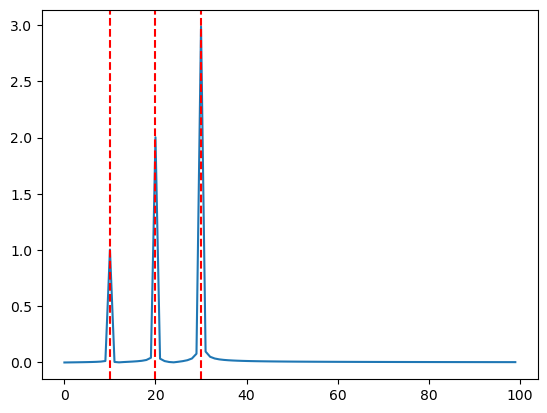

Frequency: 10, Coefficient: 1.0
Frequency: 20, Coefficient: 2.0
Frequency: 30, Coefficient: 2.99
Time taken for DFT:  0.4858555793762207


In [3]:
'''Computing the DFT can also be done using matrix multiplication
And checking that it gives the same result as the simple DFT implementation.
This will be faster than the simple DFT implementation (due to under the hood vector parallelism from numpy), but still has O(N^2) complexity.'''
start_time = time.time()
def simple_matrix_dft(y):
    N = len(y)
    k = np.arange(N) #generate vector of indices [0, 1, 2, ..., N-1]
    n = k.reshape((N, 1)) #reshape k into a column vector
    
    M = np.exp(-2j * np.pi * k * n / N) #constructs the DFT matrix, where each element M[k, n] is given by exp(-2j * pi * k * n / N)
    c = np.dot(M, y)
    
    return c / (N/2)

c = simple_matrix_dft(y)
plt.plot(np.abs(c[:100]))
for i in [10, 20, 30]:
    plt.axvline(x=i, color='r', linestyle='--')
plt.show()


#find all frequencies with non-zero coefficients
def find_frequencies(y):
    N = len(y)
    c = simple_dft(y)
    frequencies = []
    for k in range(N//2+1):
        if np.abs(c[k]) > 1e-1:
            frequencies.append(k)
    return frequencies

freqs = find_frequencies(y)

#print all found frequencies and their coefficients
for freq in freqs:
    coef = c[freq]
    #round to nearest integer
    coef = np.round(np.abs(coef), 2)
    print(f"Frequency: {freq}, Coefficient: {coef}")
end_time = time.time()
print("Time taken for DFT: ", end_time - start_time)

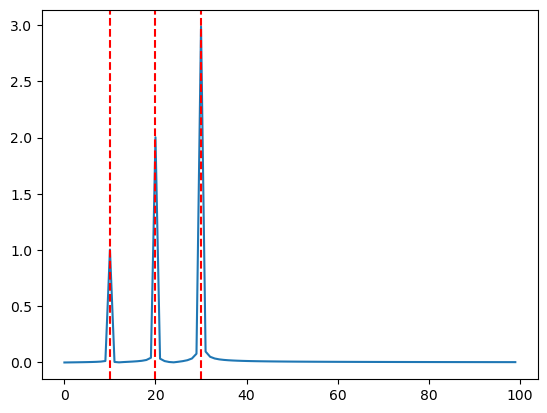

Frequency: 10, Coefficient: 1.0
Frequency: 20, Coefficient: 2.0
Frequency: 30, Coefficient: 2.99
Time taken for DFT:  0.4243009090423584


In [4]:
'''Example implementation of the Fast Fourier Transform (FFT) using the Cooley-Tukey algorithm.'''
start_time = time.time()
import numpy as np

def cooley_tukey_fft(x, N=None):
    if N is None:
        N = len(x)

    # Base case: If N is 1, return the input signal
    if N == 1:
        return x 

    # Split the input signal into even and odd indices
    even_indices = np.arange(0, N, 2)
    odd_indices = np.arange(1, N, 2)
    #DIVIDE AND CONQUER RECURSION
    X_even = cooley_tukey_fft(x[even_indices], N//2)
    X_odd = cooley_tukey_fft(x[odd_indices], N//2)

    # Create the twiddle factors
    twiddle = np.exp(-2j * np.pi * np.arange(N//2) / N)

    # Combine the even and odd parts with twiddle factors
    X = np.zeros(N, dtype=complex)
    for k in range(N//2):
        X[k] = X_even[k] + twiddle[k] * X_odd[k]
        X[k + N//2] = X_even[k] - twiddle[k] * X_odd[k]

    return X

c = cooley_tukey_fft(y, N) / (N/2)
plt.plot(np.abs(c[:100]))
for i in [10, 20, 30]:
    plt.axvline(x=i, color='r', linestyle='--')
plt.show()

#find all frequencies with non-zero coefficients
def find_frequencies(y):
    N = len(y)
    c = simple_dft(y)
    frequencies = []
    for k in range(N//2+1):
        if np.abs(c[k]) > 1e-1:
            frequencies.append(k)
    return frequencies

freqs = find_frequencies(y)

#print all found frequencies and their coefficients
for freq in freqs:
    coef = c[freq]
    #round to nearest integer
    coef = np.round(np.abs(coef), 2)
    print(f"Frequency: {freq}, Coefficient: {coef}")
end_time = time.time()
print("Time taken for DFT: ", end_time - start_time)


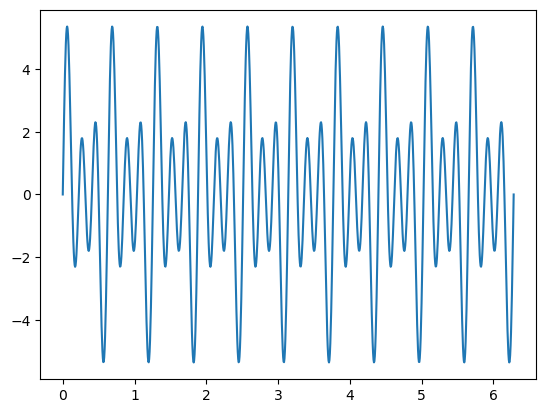

/home/nathan/miniconda3/envs/dedalus3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/nathan/miniconda3/envs/dedalus3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


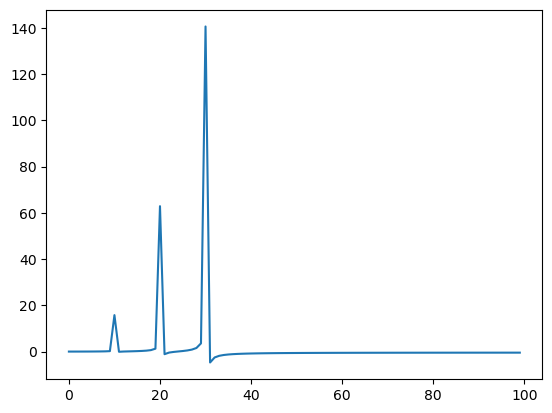

In [5]:

plt.plot(x, y)
plt.show()

y_np_fft = np.fft.fft(y)
plt.plot(y_np_fft[:100])
plt.show()

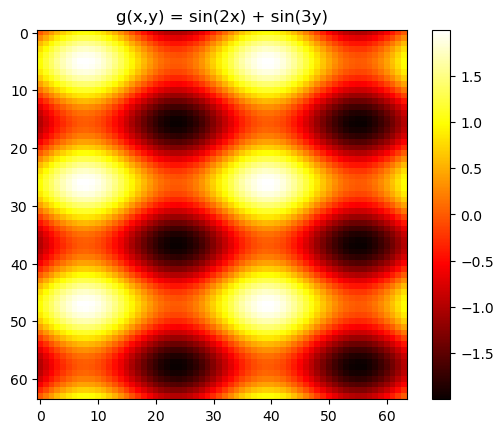

In [25]:
'''Simple example of solving a Poisson equation using spectral methods and our FFT implementation.'''

'''Poisson equation: (d^2/dx^2 + d^2/dy^2)f(x,y) = g(x,y)'''
N = 64
x = np.linspace(0, 2*np.pi, N)
y = np.linspace(0, 2*np.pi, N)
X, Y = np.meshgrid(x, y)

def g(x,y):
    return np.sin(2*x) + np.sin(3*y)

G = g(X, Y)
plt.imshow(G, cmap='hot')
plt.colorbar()
plt.title('g(x,y) = sin(2x) + sin(3y)')
plt.show()

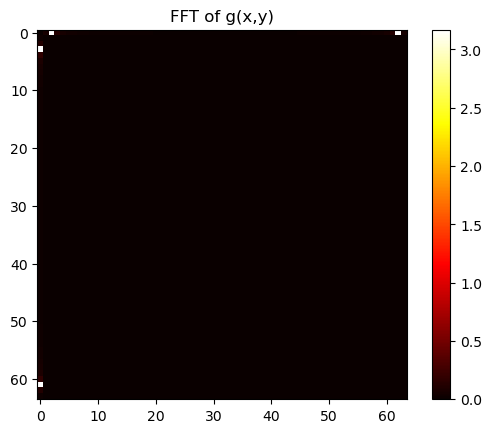

In [30]:
#fft G
def classical_dft_1d(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X
def classical_dft_2d(x):
    M, N = x.shape
    # Apply DFT on each row
    X = np.array([classical_dft_1d(row) for row in x])
    # Apply DFT on each column
    X = np.array([classical_dft_1d(col) for col in X.T]).T
    return X
G_hat = classical_dft_2d(G) / (N/2) /20
plt.imshow(np.abs(G_hat), cmap='hot')
plt.colorbar()
plt.title('FFT of g(x,y)')
plt.show()


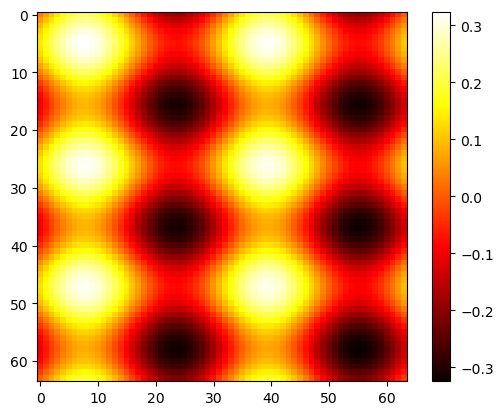

In [7]:
#compute fft of G
G_hat = np.fft.fft2(G)
G_hat[0 ,0] = 0 #set the zero frequency component to zero
#compute the wavenumbers
F_hat = np.zeros((N, N), dtype=complex)
k = np.arange(N) + 1
l = np.arange(N) + 1
K, L = np.meshgrid(k, l)
F_hat = G_hat / (K**2 + L**2)

#compute the inverse fft to get the solution
F = np.fft.ifft2(F_hat).real * 4
plt.imshow(F, cmap='hot')
plt.colorbar()
plt.show()

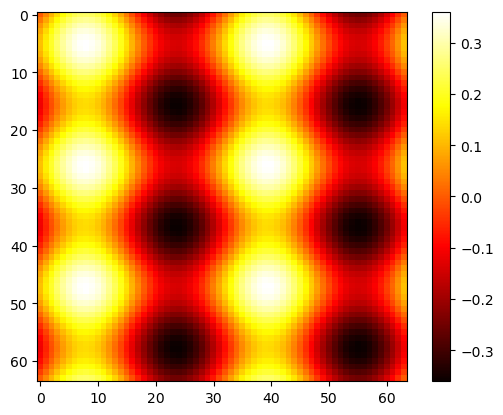

In [8]:
F_analytical = 1/4* np.sin(2*X) + 1/9*np.sin(3*Y)
plt.imshow(F_analytical, cmap='hot')
plt.colorbar()
plt.show()

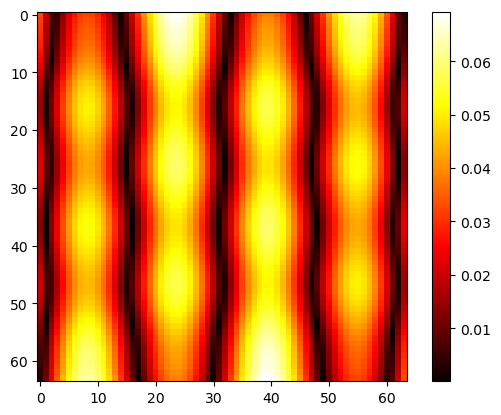

In [9]:
residual = np.abs(F - F_analytical)
plt.imshow(residual, cmap='hot')
plt.colorbar()
plt.show()

In [10]:
avg_residual = np.mean(residual)
print(f"Average residual: {avg_residual}")

Average residual: 0.031798840043220505


100%|██████████| 8/8 [03:36<00:00, 27.11s/it]


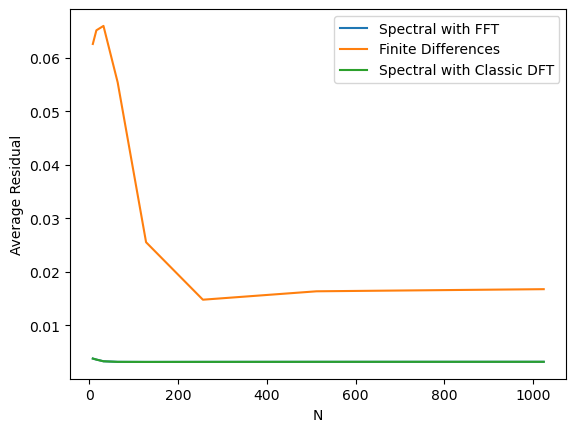

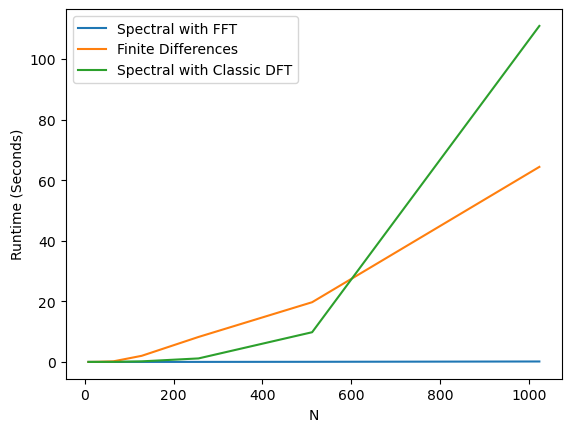

In [23]:
from tqdm import tqdm
def solve_with_fft(N=16):
    x = np.linspace(0, 2*np.pi, N)
    y = np.linspace(0, 2*np.pi, N)
    X, Y = np.meshgrid(x, y)

    def g(x,y):
        return np.sin(2*x) + np.sin(3*y)

    G = g(X, Y)
    # plt.imshow(G, cmap='hot')
    # plt.colorbar()
    # plt.show()
    #compute fft of G
    G_hat = np.fft.fft2(G)
    G_hat[0 ,0] = 0 #set the zero frequency component to zero
    #compute the wavenumbers
    F_hat = np.zeros((N, N), dtype=complex)
    k = np.arange(N) + 1
    l = np.arange(N) + 1
    K, L = np.meshgrid(k, l)
    F_hat = G_hat / (K**2 + L**2)

    #compute the inverse fft to get the solution
    F = np.fft.ifft2(F_hat).real * 4
    # plt.imshow(F, cmap='hot')
    # plt.colorbar()
    # plt.show()

    F_analytical = 1/4* np.sin(2*X) + 1/9*np.sin(3*Y)

    residual = np.abs(F - F_analytical)

    avg_residual = np.mean(residual)

    return avg_residual

def solve_with_finite_diff(N=16):
    x = np.linspace(0, 2*np.pi, N)
    y = np.linspace(0, 2*np.pi, N)
    X, Y = np.meshgrid(x, y)

    def g(x, y):
        return np.sin(2*x) + np.sin(3*y)

    # Discretize g(x,y)
    G = g(X, Y)

    # Initialize F to zeros
    F = np.zeros((N, N))

    # Discretize the Laplacian operator
    L = np.zeros((N, N))
    dx = 2*np.pi / N
    for i in range(N):
        for j in range(N):
            if i == 0 or i == N-1 or j == 0 or j == N-1:
                L[i, j] = 0
            else:
                L[i, j] = (G[i+1, j] + G[i-1, j] + G[i, j+1] + G[i, j-1] - 4*G[i, j]) / dx**2

    # Solve the Poisson equation using Jacobi iteration
    max_iter = 100
    tol = 1e-6
    for _ in range(max_iter):
        F_new = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                if i == 0 or i == N-1 or j == 0 or j == N-1:
                    F_new[i, j] = G[i, j]
                else:
                    F_new[i, j] = 0.25 * (F[i+1, j] + F[i-1, j] + F[i, j+1] + F[i, j-1] - dx**2 * L[i, j])

        if np.linalg.norm(F_new - F) < tol:
            break

        F = F_new

    F_analytical = 1/4* np.sin(2*X) + 1/9*np.sin(3*Y)

    residual = np.abs(F - F_analytical)

    avg_residual = np.mean(residual)

    return avg_residual

def solve_with_classic_dft():
    def classical_dft_1d(x):
        N = len(x)
        n = np.arange(N)
        k = n.reshape((N, 1))
        e = np.exp(-2j * np.pi * k * n / N)
        X = np.dot(e, x)
        return X
    def classical_dft_2d(x):
        M, N = x.shape
        # Apply DFT on each row
        X = np.array([classical_dft_1d(row) for row in x])
        # Apply DFT on each column
        X = np.array([classical_dft_1d(col) for col in X.T]).T
        return X
    x = np.linspace(0, 2*np.pi, N)
    y = np.linspace(0, 2*np.pi, N)
    X, Y = np.meshgrid(x, y)

    def g(x,y):
        return np.sin(2*x) + np.sin(3*y)

    G = g(X, Y)
    # plt.imshow(G, cmap='hot')
    # plt.colorbar()
    # plt.show()
    #compute fft of G
    G_hat = classical_dft_2d(G)
    G_hat[0 ,0] = 0 #set the zero frequency component to zero
    #compute the wavenumbers
    F_hat = np.zeros((N, N), dtype=complex)
    k = np.arange(N) + 1
    l = np.arange(N) + 1
    K, L = np.meshgrid(k, l)
    F_hat = G_hat / (K**2 + L**2)

    #compute the inverse fft to get the solution
    F = np.fft.ifft2(F_hat).real * 4
    # plt.imshow(F, cmap='hot')
    # plt.colorbar()
    # plt.show()

    F_analytical = 1/4* np.sin(2*X) + 1/9*np.sin(3*Y)

    residual = np.abs(F - F_analytical)

    avg_residual = np.mean(residual)

    return avg_residual



N_values = [8, 16, 32, 64, 128, 
            256, 512, 1024
            ]
fft_residuals = []
finite_diff_residuals = []
fft_runtime = []
finite_diff_runtime = []
classic_dft_residuals = []
classic_dft_runtime = []

for N in tqdm(N_values):
    start_time = time.time()
    avg_residual = solve_with_fft(N)
    end_time = time.time()
    fft_residuals.append(avg_residual)
    fft_runtime.append(end_time - start_time)

    start_time = time.time()
    avg_residual = solve_with_finite_diff(N)
    end_time = time.time()
    finite_diff_residuals.append(avg_residual)
    finite_diff_runtime.append(end_time - start_time)

    start_time = time.time()
    avg_residual = solve_with_classic_dft()
    end_time = time.time()
    classic_dft_residuals.append(avg_residual)
    classic_dft_runtime.append(end_time - start_time)



plt.plot(N_values, fft_residuals, label='Spectral with FFT')
plt.plot(N_values, finite_diff_residuals, label='Finite Differences')
plt.plot(N_values, classic_dft_residuals, label='Spectral with Classic DFT')
plt.xlabel('N')
plt.ylabel('Average Residual')
# plt.yscale('log')
# plt.xscale('log')
plt.legend()

plt.show()

plt.plot(N_values, fft_runtime, label='Spectral with FFT')
plt.plot(N_values, finite_diff_runtime, label='Finite Differences')
plt.plot(N_values, classic_dft_runtime, label='Spectral with Classic DFT')
plt.xlabel('N')
plt.ylabel('Runtime (Seconds)')
# plt.yscale('log')
# plt.xscale('log')
plt.legend()
plt.show()